In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exposure times

In [2]:

factor = np.pi / (1.51*10e7 * 4*np.log(2))

# RC telescope:
R = 0.1  # Radius of primaray mirror in meters
r = 0.05 # Radius of secondary mirror in meters
A = np.pi * (R**2 - r**2)   # Total area of the telescope
M = 0.95 # Reflectivity of the mirrors (both 95%)

# Camera stuff
QE = 0.8       # Average quantum efficeincy for the ASI2600MM Pro camera
FWHM = 12     # FWHM of the Gaussian from photon spread
Np = 0.8 * 50000     # gain * full well(?) - best dynamix range(?)

filters_set = 'ZWO'

# Filter dataframe
filters = pd.read_csv("data/filters/filters.csv")


In [3]:
def factor(filters, band):
    top = Np * (filters[filters['band'] == band]['central_wavelength[nm]']).values[0] * np.pi * FWHM**2
    bottom = A * (filters[filters['band'] == band]['wavelength_range[nm]']).values[0] * (filters[filters['band'] == band]['zero_point_flux[Jy]']).values[0] * 1.51e7 * QE * M**2 * 4 * np.log(2) 
    return top/bottom

def exp_time(m, factor):
    return factor * 10**(m/2.5)

m = np.linspace(5,15,100)

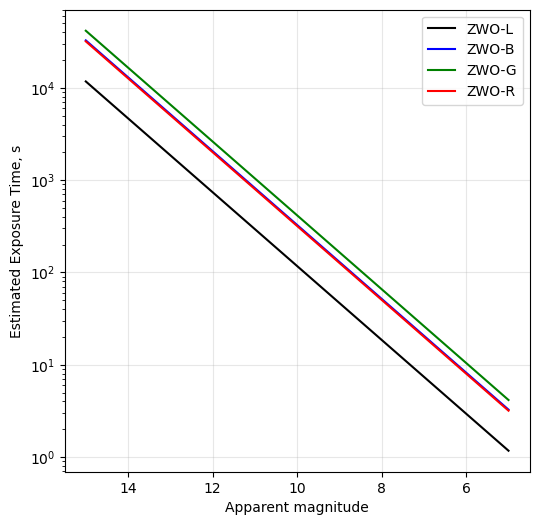

In [4]:
zwo_filters = filters[(filters["type"] == 'ZWO')]

plt.figure(figsize=(6, 6))
plt.plot(m, exp_time(m, factor(zwo_filters, 'L')), c='k', label='ZWO-L')
plt.plot(m, exp_time(m, factor(zwo_filters, 'B')), c='b', label='ZWO-B')
plt.plot(m, exp_time(m, factor(zwo_filters, 'G')), c='g', label='ZWO-G')
plt.plot(m, exp_time(m, factor(zwo_filters, 'R')), c='r', label='ZWO-R')
plt.legend()
plt.ylabel("Estimated Exposure Time, s")
plt.xlabel("Apparent magnitude")
plt.yscale('log')
plt.gca().invert_xaxis()
plt.grid(alpha=0.3)
plt.show()

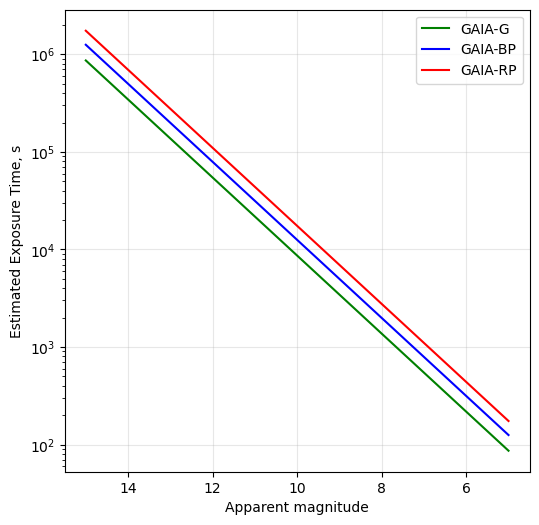

In [5]:
gaia_filters = filters[(filters["type"] == 'GAIA')]

plt.figure(figsize=(6, 6))
plt.plot(m, exp_time(m, factor(gaia_filters, 'G')), c='g', label='GAIA-G')
plt.plot(m, exp_time(m, factor(gaia_filters, 'BP')), c='b', label='GAIA-BP')
plt.plot(m, exp_time(m, factor(gaia_filters, 'RP')), c='r', label='GAIA-RP')
plt.legend()
plt.ylabel("Estimated Exposure Time, s")
plt.xlabel("Apparent magnitude")
plt.yscale('log')
plt.gca().invert_xaxis()
plt.grid(alpha=0.3)
plt.show()

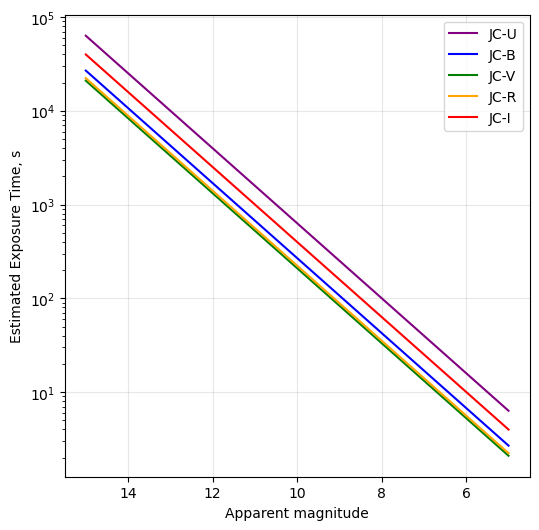

In [6]:
JC_filters = filters[(filters["type"] == 'JC')]

plt.figure(figsize=(6, 6))
plt.plot(m, exp_time(m, factor(JC_filters, 'U')), c='purple', label='JC-U')
plt.plot(m, exp_time(m, factor(JC_filters, 'B')), c='b', label='JC-B')
plt.plot(m, exp_time(m, factor(JC_filters, 'V')), c='g', label='JC-V')
plt.plot(m, exp_time(m, factor(JC_filters, 'R')), c='orange', label='JC-R')
plt.plot(m, exp_time(m, factor(JC_filters, 'I')), c='r', label='JC-I')
plt.legend()
plt.ylabel("Estimated Exposure Time, s")
plt.xlabel("Apparent magnitude")
plt.yscale('log')
plt.gca().invert_xaxis()
plt.grid(alpha=0.3)
plt.show()

In [7]:
## Additional things that can be implemented
# Cameras QE profile
# Filters transmission profile
# atmosphere extrinction